<a href="https://colab.research.google.com/github/varshathejes/thejescodez/blob/main/Russia_war_losses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
data_1=pd.read_csv('/content/russia_losses_equipment.csv')
data_1

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,25-02-2022,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,26-02-2022,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,27-02-2022,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,28-02-2022,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,01-03-2022,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,26-06-2022,123,217,184,1532,3659,764,243,NaN,NaN,630,14,99,60.0,NaN,Bakhmut and Kurakhove,2564.0,139.0
122,27-06-2022,124,217,184,1552,3687,771,243,NaN,NaN,636,14,101,60.0,NaN,Bakhmut and Kurakhove,2575.0,139.0
123,28-06-2022,125,217,185,1567,3704,778,243,NaN,NaN,636,14,102,61.0,NaN,Bakhmut,2589.0,139.0
124,29-06-2022,126,217,185,1572,3720,781,246,NaN,NaN,640,14,103,61.0,NaN,Bakhmut,2598.0,142.0


In [ ]:
data_1.isnull().sum()

date                          0
day                           0
aircraft                      0
helicopter                    0
tank                          0
APC                           0
field artillery               0
MRL                           0
military auto                61
fuel tank                    61
drone                         0
naval ship                    0
anti-aircraft warfare         0
special equipment            19
mobile SRBM system           90
greatest losses direction    59
vehicles and fuel tanks      65
cruise missiles              65
dtype: int64

In [ ]:
data=data_1.drop(['date','greatest losses direction','military auto', 'fuel tank','special equipment','mobile SRBM system','vehicles and fuel tanks','cruise missiles'], axis=1)
data

,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare
0,2,10,7,80,516,49,4,0,2,0
1,3,27,26,146,706,49,4,2,2,0
2,4,27,26,150,706,50,4,2,2,0
3,5,29,29,150,816,74,21,3,2,5
4,6,29,29,198,846,77,24,3,2,7
...,...,...,...,...,...,...,...,...,...,...
121,123,217,184,1532,3659,764,243,630,14,99
122,124,217,184,1552,3687,771,243,636,14,101
123,125,217,185,1567,3704,778,243,636,14,102
124,126,217,185,1572,3720,781,246,640,14,103


In [ ]:
data.isnull().sum()

day                      0
aircraft                 0
helicopter               0
tank                     0
APC                      0
field artillery          0
MRL                      0
drone                    0
naval ship               0
anti-aircraft warfare    0
dtype: int64

In [ ]:
correlation=data.corr()
correlation

,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare
day,1.000000,0.923004,0.891383,0.992313,0.993397,0.995786,0.990475,0.982724,0.964473,0.957893
aircraft,0.923004,1.000000,0.972061,0.949145,0.941287,0.937980,0.947665,0.863212,0.942779,0.980007
helicopter,0.891383,0.972061,1.000000,0.915364,0.913617,0.912779,0.918910,0.815476,0.896286,0.968569
tank,0.992313,0.949145,0.915364,1.000000,0.998590,0.994452,0.996649,0.975721,0.980194,0.979928
APC,0.993397,0.941287,0.913617,0.998590,1.000000,0.996766,0.995283,0.979077,0.977236,0.976558
field artillery,0.995786,0.937980,0.912779,0.994452,0.996766,1.000000,0.991972,0.976598,0.973479,0.970439
MRL,0.990475,0.947665,0.918910,0.996649,0.995283,0.991972,1.000000,0.969874,0.978017,0.980551
drone,0.982724,0.863212,0.815476,0.975721,0.979077,0.976598,0.969874,1.000000,0.957020,0.918114
naval ship,0.964473,0.942779,0.896286,0.980194,0.977236,0.973479,0.978017,0.957020,1.000000,0.965159
anti-aircraft warfare,0.957893,0.980007,0.968569,0.979928,0.976558,0.970439,0.980551,0.918114,0.965159,1.000000


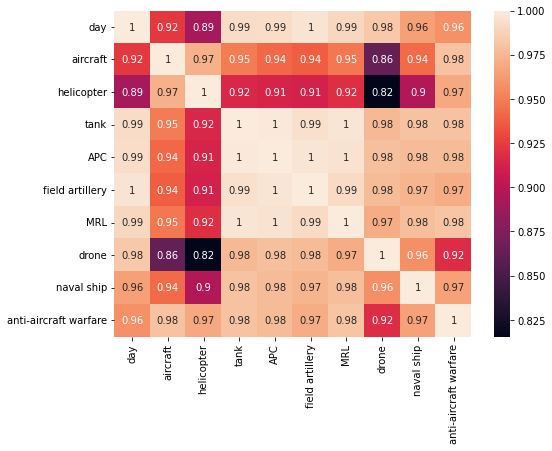

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True)

There are high correlation between independent and dependent variables so let's select two variables for model.

## Simple linear Regression

In [ ]:
X1=data['aircraft'].values 
X2=data['field artillery'].values 
Y=data['anti-aircraft warfare'].values

X1_mean=np.mean(X1)
X2_mean=np.mean(X2) 
y_mean=np.mean(Y)

n = len(Y)
numer = 0
denom = 0

for i in range(n):
    numer += (X1[i] - X1_mean) * (Y[i] - y_mean)
    denom += (X1[i] - X1_mean) ** 2
b1 = numer / denom
b0 = y_mean - (b1 * X1_mean)
print("b0 value: ", round(b0,2))
print("b1 value: ", round(b1,2))
print("The Simple Linear Regression Equation: Y = ", round(b0,2), " + ", round(b1,2), "x" )


b0 value:  -3.23
b1 value:  0.45
The Simple Linear Regression Equation: Y =  -3.23  +  0.45 x


# Multiple linear Regression

In [ ]:
n = len(Y)
numer = 0
denom = 0
def ans(a,b):
    lis=[]
    for i in range(0,len(Y)):
        lis.append(a[i]*b[i]);
        return sum(lis)
def result(x,y):
    z=ans(x,y)-((sum(x)*sum(y))/len(y));
    return z
for i in range(n):
    b2numer=((result(X1,X1)*result(X2,Y))-(result(X1,X2)*result(X1,Y)));
    b2denom=((result(X1,X1)*result(X2,X2))-(result(X1,X2)*result(X1,X2))); 
    b1numer=((result(X2,X2)*result(X1,Y))-(result(X1,X2)*result(X2,Y)));
    b1denom=((result(X1,X1)*result(X2,X2))-(result(X1,X2)*result(X1,X2)));      
b1 = b1numer / b1denom
b2 = b2numer / b2denom
bo = y_mean - (b1 * X1_mean) - (b2 * X2_mean)
print(b0, b1, b2)

print("Y=",round(b0,2),"+",round(b1,2),"x1 +",round(b2,2),"x2")

-3.228276053850223 1.0111829791077733 -0.2063638732852144
Y= -3.23 + 1.01 x1 + -0.21 x2


In [ ]:
x=data.drop(['anti-aircraft warfare'],axis=1).values
y=data['anti-aircraft warfare'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 17.87309676  61.47710367  57.81581829  45.11703533  76.90996926
  95.96538588  66.23982129  94.39112525  15.56594804  98.15594099
  24.92758536  83.7751677   95.79918108  62.36430014  93.05355673
  12.50933739  96.22857425  91.99813125  43.28341615  58.75664237
  67.97614967  95.30869075  94.94205776  73.80346637  33.56769722
  47.44848454  98.12358823  28.51186792  51.87633512  88.06815976
  45.8081732   98.7487947   75.20953284  73.1427398   99.46297288
  88.48704808  11.7062726   81.91862463  13.03871584  71.70792719
  96.59346079  95.54905483  98.33884872  62.88805135 100.18130126
  81.04421401  47.5768124   37.20383688  98.39463067  28.30754062
  94.74732072  86.61786435  98.29794072  94.20186718  95.21560615
  12.82795057  87.39902074  57.69225896  57.99767417  13.07176459
  29.84309177  35.03191446  64.08491579  56.5456403   54.63675499
  13.75023226  65.32965065  96.94695107  95.08940586   3.44128419
  52.50949938  48.59265898  66.60839185  54.03148324  43.98505696
  86.96135

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.989803409693146

In [ ]:
pred_y=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred})
pred_y[0:20]

,Actual Value,Predicted value
0,19,17.873097
1,66,61.477104
2,55,57.815818
3,45,45.117035
4,73,76.909969
5,95,95.965386
6,67,66.239821
7,93,94.391125
8,18,15.565948
9,97,98.155941


In [ ]:
pred_y=pd.DataFrame({'difference':y_test-y_pred})
pred_y[0:20]

,difference
0,1.126903
1,4.522896
2,-2.815818
3,-0.117035
4,-3.909969
5,-0.965386
6,0.760179
7,-1.391125
8,2.434052
9,-1.155941
